In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
# import soundfile as sf
from scipy.fft import rfft,rfftfreq
import librosa
import librosa.display
import IPython.display as ipd
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier

warnings.filterwarnings('ignore')

In [2]:
def mfcc_feature_extractor(audio,sampleRate):
    mfccsFeatures = librosa.feature.mfcc(y=audio, sr=sampleRate, n_mfcc=40)
    mfccsScaledFeatures = np.mean(mfccsFeatures.T,axis=0)
    
    return mfccsScaledFeatures

In [3]:
def contrast_feature_extractor(audio,sampleRate):
    stft = np.abs(librosa.stft(audio))
    contrast = librosa.feature.spectral_contrast(S=stft, sr=sampleRate) 
    contrastScaled = np.mean(contrast.T,axis=0)
    
    return contrastScaled

In [4]:
def tonnetz_feature_extractor(audio,sampleRate):
    tonnetz = librosa.feature.tonnetz(y=librosa.effects.harmonic(audio), sr=sampleRate)
    tonnetzScaled = np.mean(tonnetz.T,axis=0)
    
    return tonnetzScaled

In [5]:
def chroma_feature_extractor(audio,sampleRate):
    stft = np.abs(librosa.stft(audio))
    chroma = librosa.feature.chroma_stft(S=stft,sr=sampleRate)
    chromaScaled = np.mean(chroma.T,axis=0)
    
    return chromaScaled

In [6]:
def features_extractor(file):
    features=[]
    audio, sampleRate = librosa.load(file, res_type='kaiser_fast') 
    mfcc=mfcc_feature_extractor(audio,sampleRate)
    contrast = contrast_feature_extractor(audio,sampleRate)
    tonnetz = tonnetz_feature_extractor(audio,sampleRate)
    chroma = chroma_feature_extractor(audio,sampleRate)

    features.append([mfcc,contrast,tonnetz,chroma])
    features[0] = np.concatenate((features[0][0],features[0][1],features[0][2],features[0][3]))
    return features

In [7]:
def add_features(extractedFeatures,dirPath,label):
    for file in os.listdir(dirPath):
        filePath = dirPath+'/'+file
        finalClassLabels=label
        audio, sampleRate = librosa.load(filePath, res_type='kaiser_fast') 
        mfcc=mfcc_feature_extractor(audio,sampleRate)
        contrast = contrast_feature_extractor(audio,sampleRate)
        tonnetz = tonnetz_feature_extractor(audio,sampleRate)
        chroma = chroma_feature_extractor(audio,sampleRate)
        extractedFeatures.append([mfcc,contrast,tonnetz,chroma,finalClassLabels])

In [8]:
dict = {"in group":
        ["C:/Users/Anwar/Desktop/SBME 2024/YEAR 3 (2022-2023)/DSP/Tasks/Task 3/DSP_Task3/backend/files/Anwar",
         "C:/Users/Anwar/Desktop/SBME 2024/YEAR 3 (2022-2023)/DSP/Tasks/Task 3/DSP_Task3/backend/files/Aya",
         "C:/Users/Anwar/Desktop/SBME 2024/YEAR 3 (2022-2023)/DSP/Tasks/Task 3/DSP_Task3/backend/files/Ehab",
         "C:/Users/Anwar/Desktop/SBME 2024/YEAR 3 (2022-2023)/DSP/Tasks/Task 3/DSP_Task3/backend/files/Zeyad",
         "C:/Users/Anwar/Desktop/SBME 2024/YEAR 3 (2022-2023)/DSP/Tasks/Task 3/DSP_Task3/processing/anwar",
         "C:/Users/Anwar/Desktop/SBME 2024/YEAR 3 (2022-2023)/DSP/Tasks/Task 3/DSP_Task3/processing/aya",
         "C:/Users/Anwar/Desktop/SBME 2024/YEAR 3 (2022-2023)/DSP/Tasks/Task 3/DSP_Task3/processing/ehab",
         "C:/Users/Anwar/Desktop/SBME 2024/YEAR 3 (2022-2023)/DSP/Tasks/Task 3/DSP_Task3/processing/zeyad",
         "C:/Users/Anwar/Desktop/SBME 2024/YEAR 3 (2022-2023)/DSP/Tasks/Task 3/DSP_Task3/processing/words/Anwar",
         "C:/Users/Anwar/Desktop/SBME 2024/YEAR 3 (2022-2023)/DSP/Tasks/Task 3/DSP_Task3/processing/words/Aya",
         "C:/Users/Anwar/Desktop/SBME 2024/YEAR 3 (2022-2023)/DSP/Tasks/Task 3/DSP_Task3/processing/words/Ehab",
         "C:/Users/Anwar/Desktop/SBME 2024/YEAR 3 (2022-2023)/DSP/Tasks/Task 3/DSP_Task3/processing/words/Zeyad"],
                "out of group":
                    ["C:/Users/Anwar/Desktop/SBME 2024/YEAR 3 (2022-2023)/DSP/Tasks/Task 3/DSP_Task3/backend/outGroup"]}

    


In [9]:
extractedFeatures = []
for i in dict.keys():
    for x in dict[i]:
        add_features(extractedFeatures,x,i)

In [10]:
data=pd.DataFrame(extractedFeatures,columns=['mfcc','contrast','tonnetz','chroma','class'])
print(data.shape)
data.head()

(2247, 5)


,mfcc,contrast,tonnetz,chroma,class
0,"[-506.52463, 61.64891, 8.294457, 6.1529727, 16...","[18.225099789410645, 14.073347582034515, 14.92...","[-0.026156166403453775, -0.007522828056776607,...","[0.7895138, 0.7891665, 0.7331944, 0.69265306, ...",in group
1,"[-484.83054, 57.63201, 19.381887, 17.619091, 1...","[20.11971653181864, 14.4055109778802, 15.14931...","[0.020898464482939905, 0.02311273234743904, 0....","[0.7711498, 0.77708644, 0.7428681, 0.6990656, ...",in group
2,"[-375.71805, 95.867195, -0.6657963, 31.796244,...","[18.940401074917414, 15.716624572258736, 17.18...","[0.0030600953263598307, 0.004340534464086048, ...","[0.62990934, 0.66626626, 0.70043945, 0.7260682...",in group
3,"[-351.94073, 53.247982, 12.9672785, 10.35929, ...","[18.990867307267536, 14.260342060954631, 16.18...","[-0.013442975463150214, -0.03099029914648438, ...","[0.7548545, 0.85651636, 0.81929094, 0.6672034,...",in group
4,"[-442.27194, 81.52423, 17.646692, 13.47512, 12...","[20.260033821862628, 13.37880827112114, 15.661...","[-0.021241162685261376, -0.021280018761884012,...","[0.665574, 0.78218377, 0.7599841, 0.68303883, ...",in group


In [11]:
features=data.iloc[:,0:-1]
target=data['class']
features.head()

,mfcc,contrast,tonnetz,chroma
0,"[-506.52463, 61.64891, 8.294457, 6.1529727, 16...","[18.225099789410645, 14.073347582034515, 14.92...","[-0.026156166403453775, -0.007522828056776607,...","[0.7895138, 0.7891665, 0.7331944, 0.69265306, ..."
1,"[-484.83054, 57.63201, 19.381887, 17.619091, 1...","[20.11971653181864, 14.4055109778802, 15.14931...","[0.020898464482939905, 0.02311273234743904, 0....","[0.7711498, 0.77708644, 0.7428681, 0.6990656, ..."
2,"[-375.71805, 95.867195, -0.6657963, 31.796244,...","[18.940401074917414, 15.716624572258736, 17.18...","[0.0030600953263598307, 0.004340534464086048, ...","[0.62990934, 0.66626626, 0.70043945, 0.7260682..."
3,"[-351.94073, 53.247982, 12.9672785, 10.35929, ...","[18.990867307267536, 14.260342060954631, 16.18...","[-0.013442975463150214, -0.03099029914648438, ...","[0.7548545, 0.85651636, 0.81929094, 0.6672034,..."
4,"[-442.27194, 81.52423, 17.646692, 13.47512, 12...","[20.260033821862628, 13.37880827112114, 15.661...","[-0.021241162685261376, -0.021280018761884012,...","[0.665574, 0.78218377, 0.7599841, 0.68303883, ..."


In [12]:
features = features.values.tolist()
for i in range(len(features)):
    features[i] = np.concatenate((features[i][0],features[i][1],features[i][2],features[i][3]))

In [13]:
encoder = LabelEncoder()
target = encoder.fit_transform(target)

In [14]:
xTrain, xTest, yTrain, yTest = train_test_split(features, target, test_size=0.25, random_state=0)

In [15]:
model_data = pd.DataFrame(xTrain)
model_data["target"] = yTrain
model_data.to_csv("model_data.csv",index=False)

In [16]:
classifier= SVC(kernel='linear', decision_function_shape="ovo")
classifier.fit(xTrain,yTrain)

SVC(decision_function_shape='ovo', kernel='linear')

In [17]:
preds = classifier.predict(xTest)

In [18]:
def prediction(pred):
    if pred==0:
        print("in group")
    elif pred==1:
        print("out of group")


In [19]:
print(classification_report(yTest,preds))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       290
           1       0.93      0.94      0.94       272

    accuracy                           0.94       562
   macro avg       0.94      0.94      0.94       562
weighted avg       0.94      0.94      0.94       562



In [20]:
testFeatures = features_extractor("C:/Users/Anwar/Desktop/SBME 2024/YEAR 3 (2022-2023)/DSP/Tasks/Task 3/DSP_Task3/processing/words/Aya/voice01100741.wav")
pred = classifier.predict(testFeatures)
prediction(pred)


in group


In [21]:
pickle_out = open("ingroup_model.pkl", "wb")
pickle.dump(classifier, pickle_out)
pickle_out.close()

In [22]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(SVC(kernel='linear', decision_function_shape="ovo"),
          k_features=3,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [23]:
features1 = pd.DataFrame(features)
features1

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-506.524628,61.648911,8.294457,6.152973,16.176821,10.323853,4.590602,7.320104,2.092774,0.728857,...,0.733194,0.692653,0.626152,0.586920,0.613776,0.708357,0.719220,0.720004,0.784712,0.786803
1,-484.830536,57.632011,19.381887,17.619091,19.403883,16.818459,7.097579,4.689476,-2.667683,-2.815277,...,0.742868,0.699066,0.636793,0.584144,0.577764,0.598752,0.613463,0.644245,0.712228,0.761738
2,-375.718048,95.867195,-0.665796,31.796244,16.883442,8.856951,-8.622080,10.251704,-3.401898,-4.236369,...,0.700439,0.726068,0.616117,0.537915,0.518417,0.568740,0.592911,0.635966,0.707647,0.666675
3,-351.940735,53.247982,12.967278,10.359290,4.430329,3.354480,-3.395457,3.935244,0.261524,-6.184865,...,0.819291,0.667203,0.545499,0.536051,0.485401,0.520946,0.622457,0.696950,0.699943,0.712167
4,-442.271942,81.524231,17.646692,13.475120,12.761144,6.999218,2.563608,9.477388,0.406027,-5.662971,...,0.759984,0.683039,0.593342,0.558049,0.531251,0.614774,0.693154,0.679847,0.673360,0.668323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,-340.589996,112.110992,-4.469810,7.619040,1.494140,-8.551105,-13.560976,-9.330451,-8.869720,-5.109504,...,0.591242,0.550208,0.560028,0.562208,0.466239,0.514763,0.605272,0.684524,0.560629,0.537737
2243,-340.350586,116.871719,0.131277,4.277313,-2.256802,-1.233995,-11.036314,-14.176747,-16.621000,-1.743692,...,0.610759,0.572815,0.526864,0.480421,0.426035,0.468862,0.577828,0.566413,0.432415,0.360021
2244,-363.385803,117.106705,15.008696,5.435640,12.969309,12.324890,-6.437033,-6.978231,-15.034419,-7.515647,...,0.586022,0.697416,0.592452,0.442732,0.434295,0.485674,0.516429,0.519507,0.433165,0.367916
2245,-352.652130,101.986923,15.242398,9.328753,0.411632,0.814499,-6.195909,-6.038311,-15.732779,-6.288479,...,0.720212,0.647249,0.548247,0.463873,0.476931,0.646562,0.728893,0.643504,0.587256,0.496186


In [24]:
sfs.fit(features1, target)
sfs.k_feature_names_

(4, 11, 45)

In [25]:
for i in range(len(xTrain)):
    xTrain[i] = xTrain[i].tolist()

In [26]:
xTrain = np.array(xTrain)

In [27]:
xTrain

array([[-2.66738708e+02,  1.03663437e+02,  4.57347250e+00, ...,
         6.65094912e-01,  6.49608910e-01,  6.42543912e-01],
       [-4.48730499e+02,  1.28073349e+02,  5.41881466e+00, ...,
         5.64448655e-01,  4.81527716e-01,  4.70946014e-01],
       [-1.32712402e+02,  1.24452629e+02, -5.78597565e+01, ...,
         8.64456952e-01,  7.29332209e-01,  5.85895121e-01],
       ...,
       [-4.08519897e+02,  1.33835327e+02,  1.11045961e+01, ...,
         6.23941481e-01,  5.90551853e-01,  5.97101927e-01],
       [-3.74894928e+02,  1.10480598e+02,  1.85306492e+01, ...,
         5.01949251e-01,  5.00471771e-01,  4.95753914e-01],
       [-4.74773224e+02,  9.46302719e+01,  9.27752435e-01, ...,
         7.55193293e-01,  6.06650174e-01,  5.73853016e-01]])

In [28]:
xtrainNew = []
for i in xTrain:
    xtrainNew.append([i[4],i[46]])
xtrainNew = np.array(xtrainNew)
xtrainNew

array([[  1.61469448,  45.28927209],
       [  8.96770382,  39.71775922],
       [-42.65184021,  62.03513454],
       ...,
       [ 17.83454895,  38.85602304],
       [  0.44862494,  37.148862  ],
       [ 10.95031548,  46.8663451 ]])

In [40]:
# # import numpy as np
# # import matplotlib.pyplot as plt
# # from sklearn import svm, datasets

# # import some data to play with
# # iris = datasets.load_iris()
X = xtrainNew  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = yTrain

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = SVC(kernel='linear', C=C , decision_function_shape="ovo").fit(X, y)
# rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
# poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
# lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
# titles = ['SVC with linear kernel',
#           'LinearSVC (linear kernel)',
#           'SVC with RBF kernel',
#           'SVC with polynomial (degree 3) kernel']


# for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
# plt.subplot(2, 2, i + 1)
# plt.subplots_adjust(wspace=0.4, hspace=0.4)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

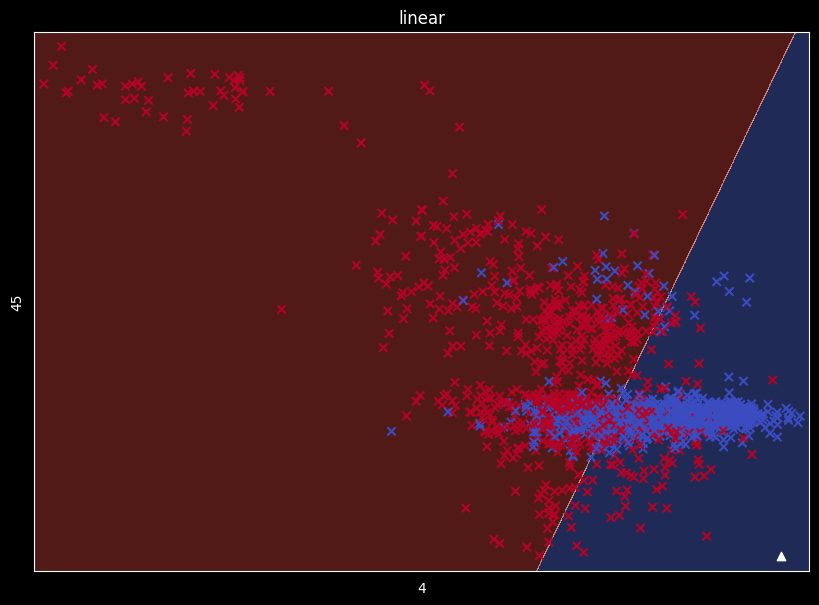

In [114]:
plt.figure(figsize=(10,7))
plt.style.context(['dark_background'])

import matplotlib as mpl
cmap = (mpl.colors.ListedColormap(['#a20000', '#ffff00']))

plt.contourf(xx, yy, Z, origin='lower', cmap= plt.cm.coolwarm, alpha=0.4,zorder=0)

plt.scatter(X[:, 0], X[:, 1], c=y,marker='x',cmap=plt.cm.coolwarm,zorder=1)


# Plot also the training points
# plt.scatter(X[:, 0], X[:, 1], c=y,marker='x',cmap=plt.cm.coolwarm,zorder=1)

plt.scatter(x=20, y=30, color = '#ffffff',marker='^',zorder=10)  # plotting single point

plt.xlabel('4')
plt.ylabel('45')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title("linear")
# plt.colorbar()
plt.show()

In [53]:
def model_plotting(firstFeature,secondFeature,x,y,xx,yy,z):
    plt.figure(figsize=(10,7))
    plt.contourf(xx, yy, z, cmap=plt.cm.coolwarm, alpha=0.8,zorder=0)

    plt.scatter(x[:, 0], x[:, 1], c=y,marker='x',cmap=plt.cm.coolwarm,zorder=1)

    plt.scatter(x=firstFeature, y=secondFeature, color = '#000000',marker='^',zorder=10)  # plotting single point

    plt.xlabel('firstFeature')
    plt.ylabel('secondFeature')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title("SVM Model with linear kernel")
    plt.show()

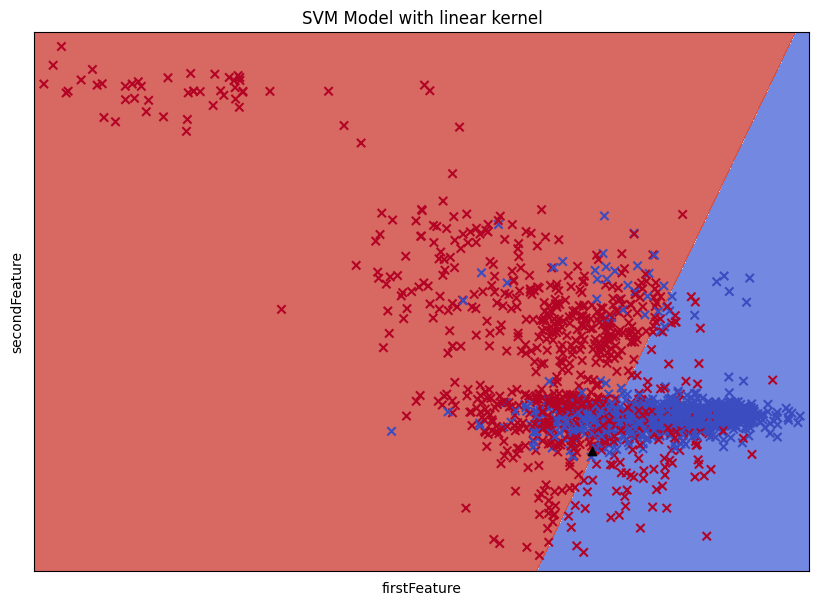

In [ ]:
model_plotting(0,37,X,y,xx,yy,Z)

In [ ]:
pickle_out = open("plotting_model.pkl", "wb")
pickle.dump(svc, pickle_out)
pickle_out.close()

In [ ]:
data = pd.read_csv("model_data.csv")
data

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,target
0,-266.738708,103.663437,4.573472,9.041640,1.614694,1.396647,-0.366143,2.718201,-15.133023,7.939022,...,0.557635,0.550570,0.579080,0.587402,0.608454,0.681707,0.665095,0.649609,0.642544,1
1,-448.730499,128.073349,5.418815,17.657125,8.967704,21.781902,-9.745255,6.164220,-4.046611,-1.489009,...,0.468016,0.495885,0.496994,0.564369,0.605995,0.568163,0.564449,0.481528,0.470946,1
2,-132.712402,124.452629,-57.859756,21.284811,-42.651840,12.879964,-33.533676,-12.255640,-32.373508,-10.699275,...,0.646030,0.656923,0.688460,0.675429,0.721130,0.809615,0.864457,0.729332,0.585895,1
3,-477.843170,83.065918,23.156742,10.397629,10.948236,3.133870,4.281215,8.819442,-5.246666,-8.278208,...,0.646809,0.633086,0.608432,0.558200,0.619973,0.699888,0.731496,0.753554,0.716039,0
4,-362.739746,88.982140,13.191752,-10.316602,-4.570636,13.831303,14.777443,5.533417,-12.949487,-5.941306,...,0.515603,0.582246,0.713369,0.724475,0.597735,0.443942,0.369199,0.328193,0.371599,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,-360.629028,85.946045,20.472349,14.858758,10.075060,9.663091,3.764751,4.749082,-9.372436,-7.246763,...,0.481995,0.494331,0.580687,0.596123,0.533046,0.587853,0.619840,0.598977,0.635037,0
1681,-402.067444,66.127922,29.439125,23.981352,1.161905,1.687719,5.675429,-2.388285,-4.676038,-2.982301,...,0.555903,0.609044,0.582295,0.589470,0.655952,0.708748,0.622503,0.554623,0.579503,1
1682,-408.519897,133.835327,11.104596,12.191189,17.834549,4.502982,0.613786,4.020524,-7.504054,0.020026,...,0.674013,0.733350,0.665058,0.666229,0.576183,0.576828,0.623941,0.590552,0.597102,0
1683,-374.894928,110.480598,18.530649,21.173965,0.448625,1.714309,15.304652,-4.517304,-6.061135,-0.784284,...,0.416184,0.403937,0.452619,0.652298,0.751744,0.602573,0.501949,0.500472,0.495754,0


In [ ]:
x= data.iloc[:,0:-1]
y = data.loc[:,'target']
x

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-266.738708,103.663437,4.573472,9.041640,1.614694,1.396647,-0.366143,2.718201,-15.133023,7.939022,...,0.592345,0.557635,0.550570,0.579080,0.587402,0.608454,0.681707,0.665095,0.649609,0.642544
1,-448.730499,128.073349,5.418815,17.657125,8.967704,21.781902,-9.745255,6.164220,-4.046611,-1.489009,...,0.512589,0.468016,0.495885,0.496994,0.564369,0.605995,0.568163,0.564449,0.481528,0.470946
2,-132.712402,124.452629,-57.859756,21.284811,-42.651840,12.879964,-33.533676,-12.255640,-32.373508,-10.699275,...,0.659431,0.646030,0.656923,0.688460,0.675429,0.721130,0.809615,0.864457,0.729332,0.585895
3,-477.843170,83.065918,23.156742,10.397629,10.948236,3.133870,4.281215,8.819442,-5.246666,-8.278208,...,0.724060,0.646809,0.633086,0.608432,0.558200,0.619973,0.699888,0.731496,0.753554,0.716039
4,-362.739746,88.982140,13.191752,-10.316602,-4.570636,13.831303,14.777443,5.533417,-12.949487,-5.941306,...,0.504630,0.515603,0.582246,0.713369,0.724475,0.597735,0.443942,0.369199,0.328193,0.371599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1680,-360.629028,85.946045,20.472349,14.858758,10.075060,9.663091,3.764751,4.749082,-9.372436,-7.246763,...,0.490178,0.481995,0.494331,0.580687,0.596123,0.533046,0.587853,0.619840,0.598977,0.635037
1681,-402.067444,66.127922,29.439125,23.981352,1.161905,1.687719,5.675429,-2.388285,-4.676038,-2.982301,...,0.643399,0.555903,0.609044,0.582295,0.589470,0.655952,0.708748,0.622503,0.554623,0.579503
1682,-408.519897,133.835327,11.104596,12.191189,17.834549,4.502982,0.613786,4.020524,-7.504054,0.020026,...,0.621752,0.674013,0.733350,0.665058,0.666229,0.576183,0.576828,0.623941,0.590552,0.597102
1683,-374.894928,110.480598,18.530649,21.173965,0.448625,1.714309,15.304652,-4.517304,-6.061135,-0.784284,...,0.407298,0.416184,0.403937,0.452619,0.652298,0.751744,0.602573,0.501949,0.500472,0.495754


In [ ]:
x = x.values
x

array([[-2.66738708e+02,  1.03663437e+02,  4.57347250e+00, ...,
         6.65094912e-01,  6.49608910e-01,  6.42543912e-01],
       [-4.48730499e+02,  1.28073349e+02,  5.41881466e+00, ...,
         5.64448655e-01,  4.81527716e-01,  4.70946014e-01],
       [-1.32712402e+02,  1.24452629e+02, -5.78597565e+01, ...,
         8.64456952e-01,  7.29332209e-01,  5.85895121e-01],
       ...,
       [-4.08519897e+02,  1.33835327e+02,  1.11045961e+01, ...,
         6.23941481e-01,  5.90551853e-01,  5.97101927e-01],
       [-3.74894928e+02,  1.10480598e+02,  1.85306492e+01, ...,
         5.01949251e-01,  5.00471771e-01,  4.95753914e-01],
       [-4.74773224e+02,  9.46302719e+01,  9.27752435e-01, ...,
         7.55193293e-01,  6.06650174e-01,  5.73853016e-01]])

In [ ]:
xNew = []
for i in x:
    xNew.append([i[4],i[46]])
xNew = np.array(xNew)
xNew

array([[  1.61469448,  45.28927209],
       [  8.96770382,  39.71775922],
       [-42.65184021,  62.03513454],
       ...,
       [ 17.83454895,  38.85602304],
       [  0.44862494,  37.148862  ],
       [ 10.95031548,  46.8663451 ]])